In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat Jun  2 11:09:55 2018

@author: Marcelo
"""

from sys import platform
from platform import node
from scipy.signal import (find_peaks, find_peaks_cwt, peak_widths)
# port (find_peaks, peak_widths, cwt, ricker, find_peaks_cwt)
from scipy.fftpack import (fft, ifft)
from scipy.stats import (entropy)
# from pathlib import Path, PurePath
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import (curve_fit, root)
from copy import deepcopy
# from numpy import cosh, zeros_like, mgrid, zeros
# from test_lists import seqmatch

import base_line_funcs as blf
import spectra_regions_funcs as spreg


In [2]:
##### AQUI DEFINO O ESPECTRO

In [3]:
sp_name = '../gamma/spectra/ALMERA-2017-3/ALM-17-3-#5_PreliA.IEC'
# sp_name = '../gamma/spectra/Diversos/CTP1508.IEC'

In [4]:
results1 = spreg.total_analysis2(sp_name)
cts_spc, lt_spc, rt_spc, xs, indics, regions, multis, lx, ly, blins, heis, nety = results1

expect_width: 4
indicescwt: [ 108  134  237  271  380  385  392  403  443  450  456  706  793  934
  944  958  968  995 1189 1209 1226 1311 1392 1495 1727 1782 1959 1969
 1998 2007 2010 2056 2086 2093 2146 2243 2304 2317 2339 2401 2418 2434
 2468 2586 2614 2767 2780 2798 2882 2939 2952 2955 3035 3086 3126 3370
 3373 3523 3541 3568 3572 3616 3629 3646 3674 3684 3699 3891 3922 3980
 3994 4016 4084 4159 4162 4183 4210 4250 4309 4379 4479 4484 4505 4509
 4516 4550 4573 4659 4701 4731 4736 4782 4885 4906 4960 4975 5093 5097
 5112 5129 5170 5305 5603 5647 5675 5682 5744 5795 5852 5855 5857 5894
 5914 5931 5937 5941 6153 6186 6266 6273 6351 6380 6488 6491 6493 6589
 6702 6706 6809 6843 6927 6979 6982 7020 7101 7104 7130 7134 7138 7154
 7198 7295 7348 7372 7403 7412 7463 7501 7567 7598 7645 7649 7794 7808
 7813 7824 7924 7992 8023 8027 8079 8134]


In [5]:
results2 = spreg.total_analysis2(sp_name, baseline='descendingthroughpeak')
results2

expect_width: 4
indicescwt: [ 108  134  237  271  380  385  392  403  443  450  456  706  793  934
  944  958  968  995 1189 1209 1226 1311 1392 1495 1727 1782 1959 1969
 1998 2007 2010 2056 2086 2093 2146 2243 2304 2317 2339 2401 2418 2434
 2468 2586 2614 2767 2780 2798 2882 2939 2952 2955 3035 3086 3126 3370
 3373 3523 3541 3568 3572 3616 3629 3646 3674 3684 3699 3891 3922 3980
 3994 4016 4084 4159 4162 4183 4210 4250 4309 4379 4479 4484 4505 4509
 4516 4550 4573 4659 4701 4731 4736 4782 4885 4906 4960 4975 5093 5097
 5112 5129 5170 5305 5603 5647 5675 5682 5744 5795 5852 5855 5857 5894
 5914 5931 5937 5941 6153 6186 6266 6273 6351 6380 6488 6491 6493 6589
 6702 6706 6809 6843 6927 6979 6982 7020 7101 7104 7130 7134 7138 7154
 7198 7295 7348 7372 7403 7412 7463 7501 7567 7598 7645 7649 7794 7808
 7813 7824 7924 7992 8023 8027 8079 8134]


'A definir.'

In [6]:
def plota (xs, cts_spc, lx, ly, blins, nety, indics, heis, xlim=(350, 500), ylim=(1e1, 1e5) ):
    plt.close('all')
    fig1, ax1 = plt.subplots(1, 1, figsize=(15,9))
    ax1.grid(True)
    ax1.set_xlim(xlim)
    ax1.set_ylim(ylim)
    ax1.set_xlabel('Canal', size=20)
    ax1.set_ylabel('Contagens', size=20)
    ax1.semilogy(xs, cts_spc, marker='.', markersize=2.0, color='lightgreen', linestyle='None')
    dummy = [ ax1.semilogy(xs, ys, marker='', color='darkred', linewidth=1.0) for xs,ys in zip(lx,ly) ]
    dummy = [ ax1.semilogy(xs, ys, marker='', color='magenta', linewidth=1.0) for xs,ys in zip(lx,blins) ]
    dummy = [ ax1.semilogy(xs, ys, marker='', color='green', linewidth=1.0) for xs,ys in zip(lx,nety) ]
    dummy = [ ax1.semilogy(xs, ys, marker='x', color='blue', linestyle='None') for xs,ys
             in zip(indics,heis) ]
    return fig1

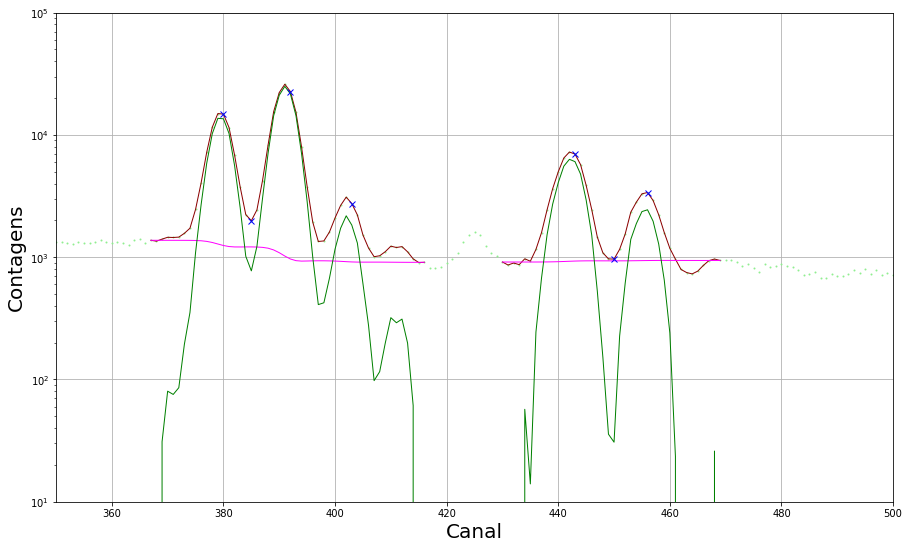

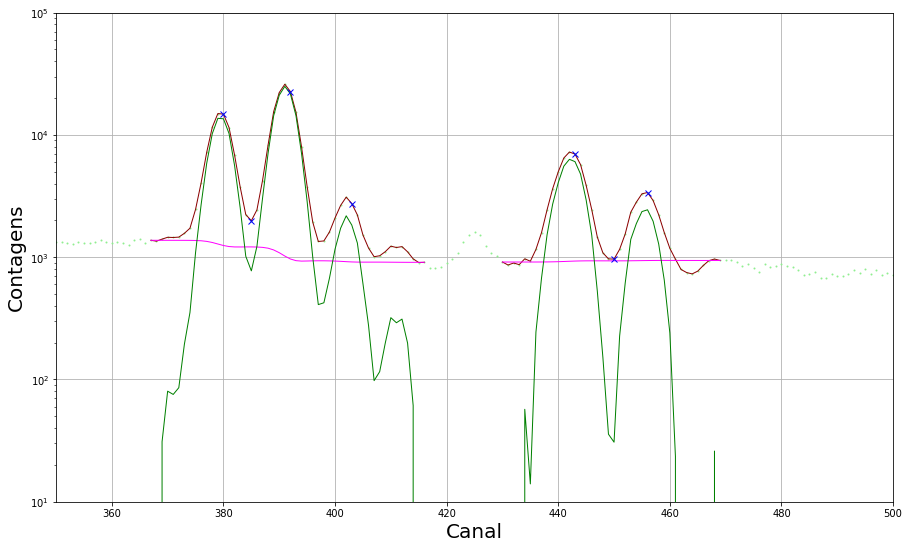

In [7]:
plota (xs, cts_spc, lx, ly, blins, nety, indics, heis, xlim=(350, 500), ylim=(1e1, 1e5) )

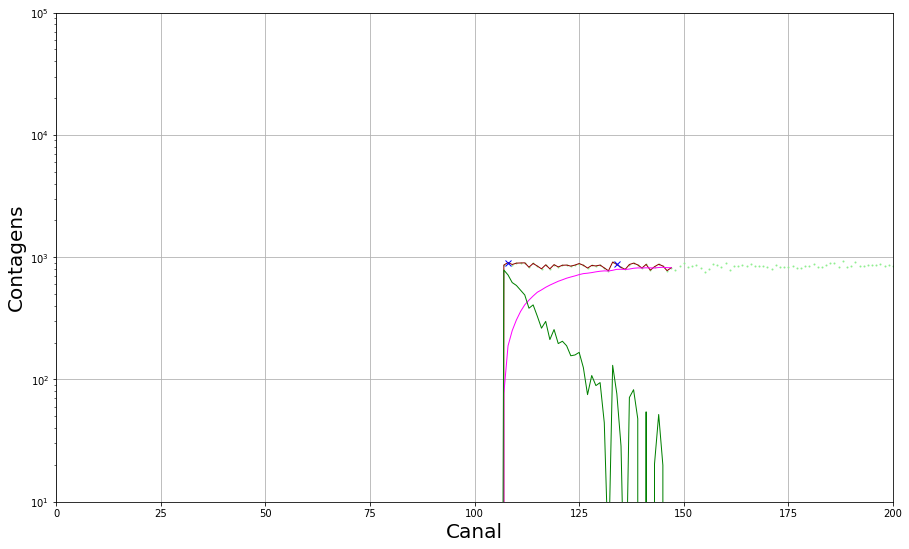

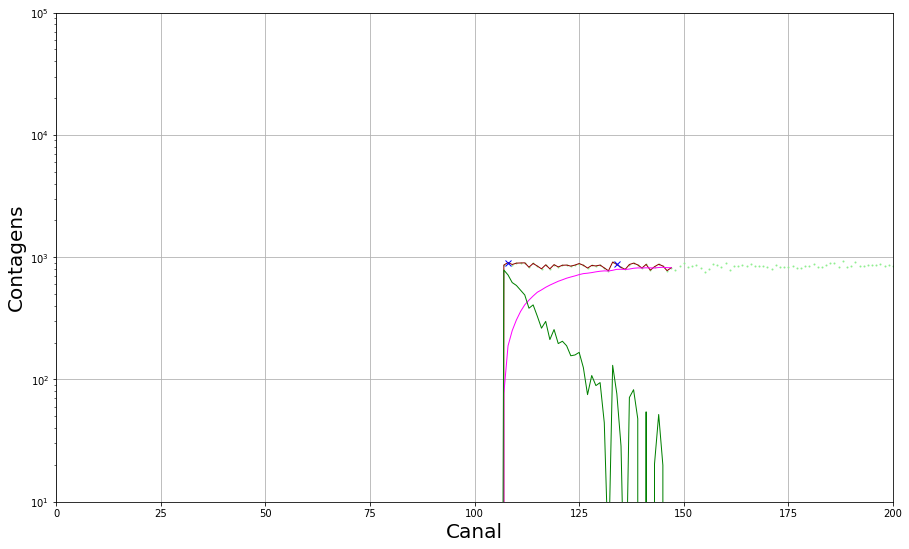

In [8]:
plota (xs, cts_spc, lx, ly, blins, nety, indics, heis, xlim=(0, 200), ylim=(1e1, 1e5) )

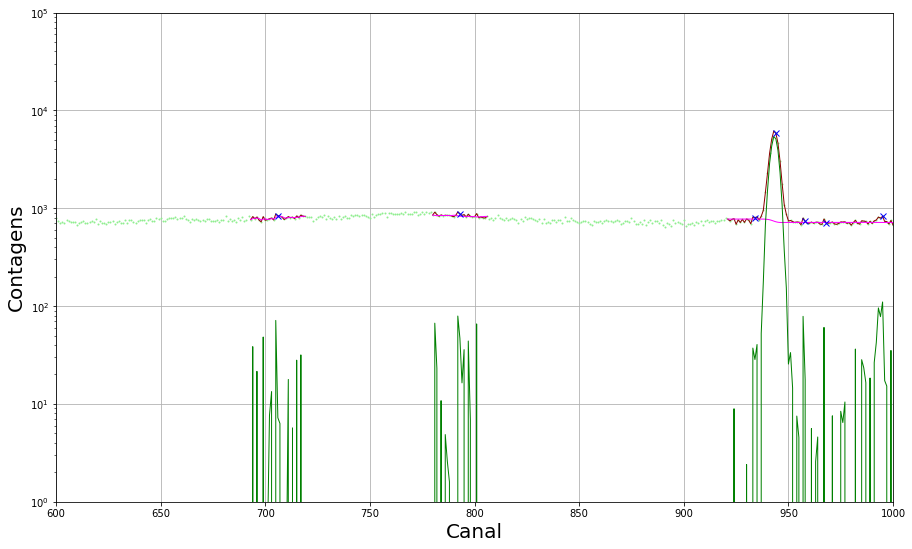

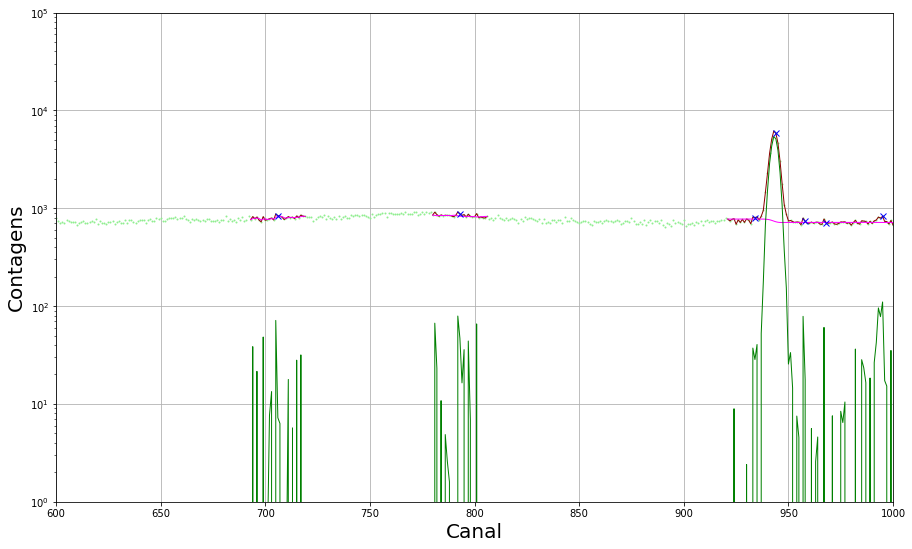

In [9]:
plota (xs, cts_spc, lx, ly, blins, nety, indics, heis, xlim=(600, 1000), ylim=(1e0, 1e5) )

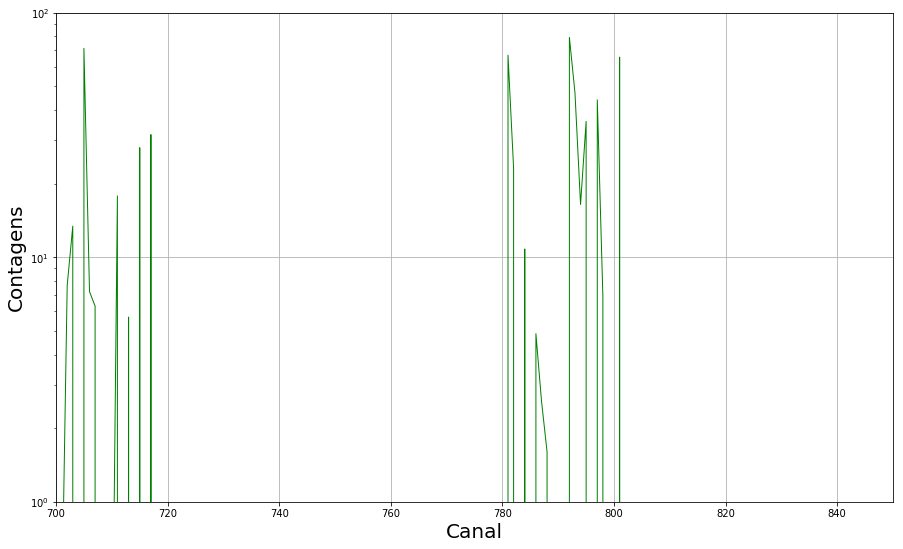

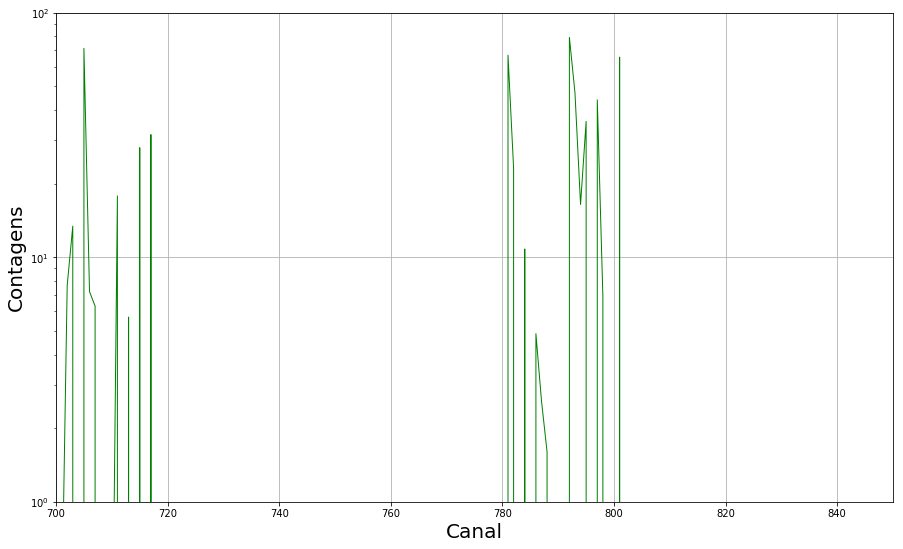

In [10]:
plota (xs, cts_spc, lx, ly, blins, nety, indics, heis, xlim=(700, 850), ylim=(1e0, 1e2) )

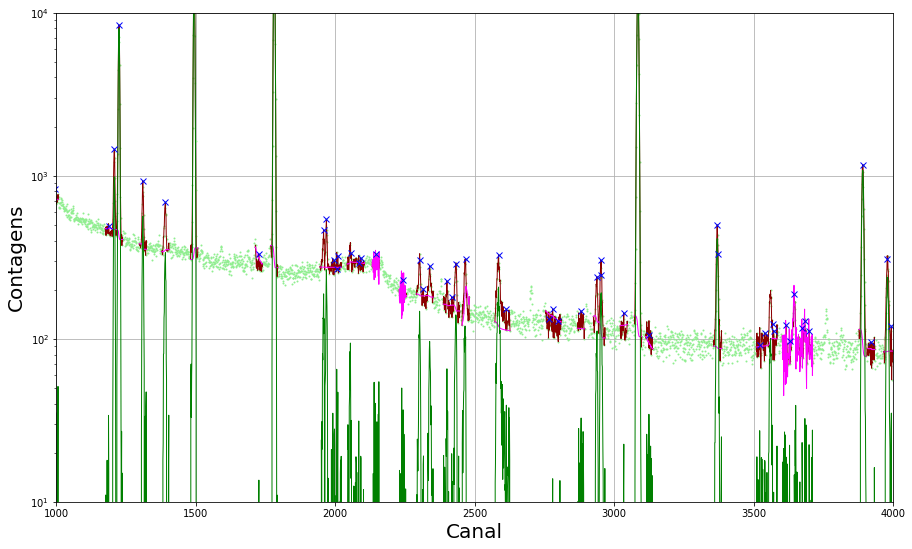

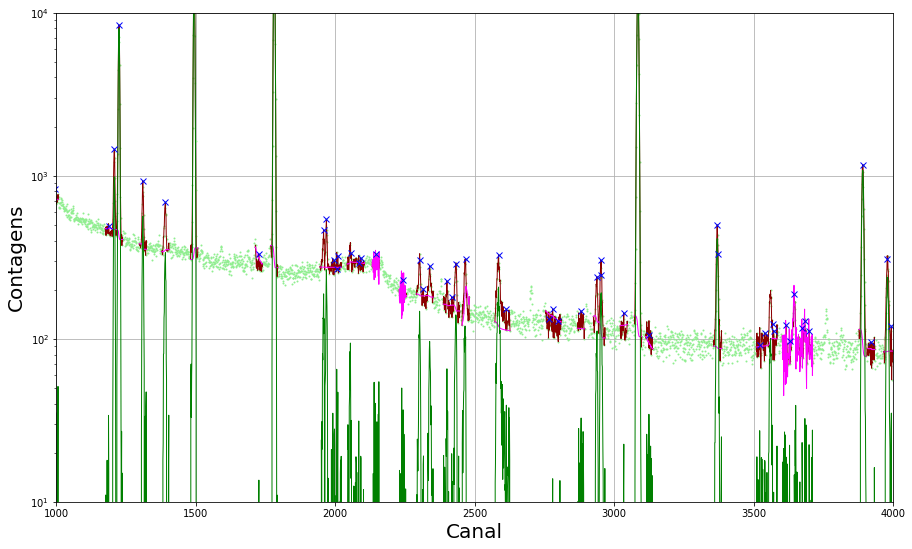

In [11]:
plota (xs, cts_spc, lx, ly, blins, nety, indics, heis, xlim=(1000, 4000), ylim=(1e1, 1e4) )

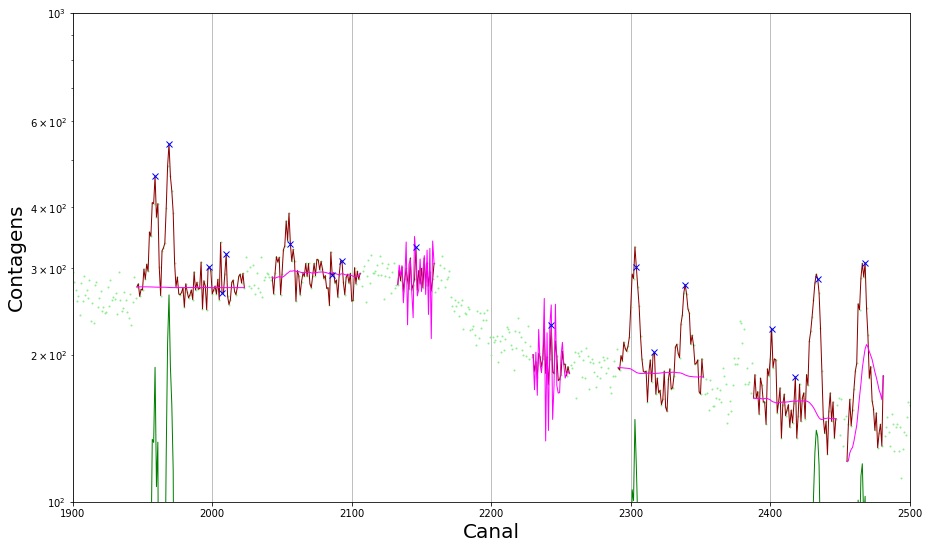

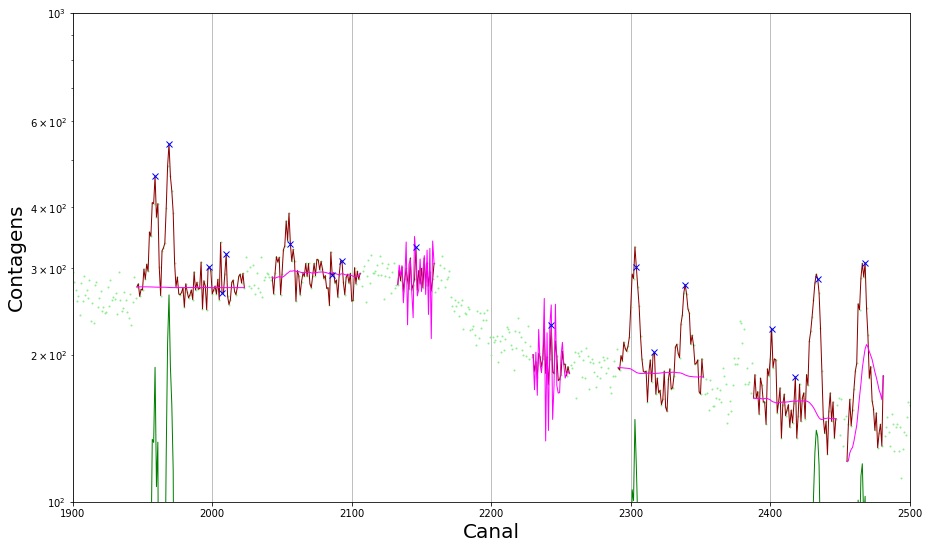

In [12]:
plota (xs, cts_spc, lx, ly, blins, nety, indics, heis, xlim=(1900, 2500), ylim=(1e2, 1e3) )

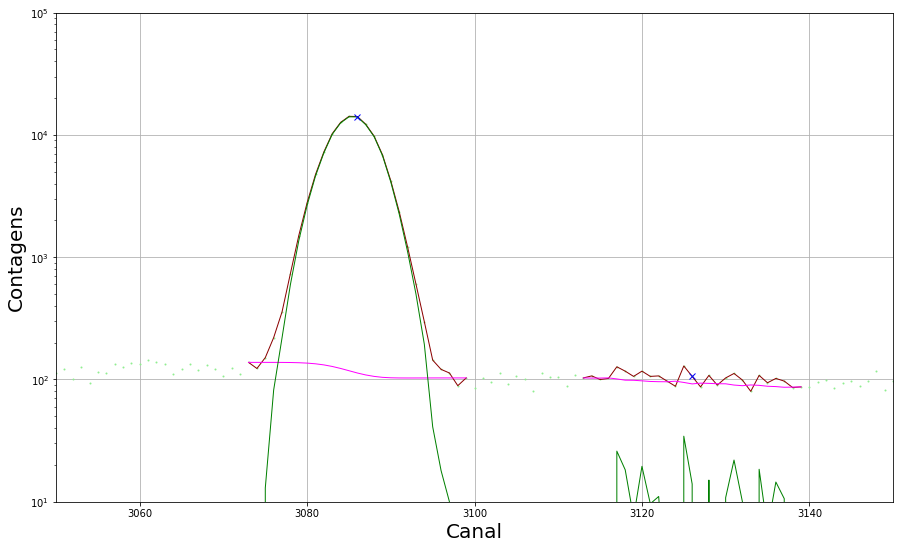

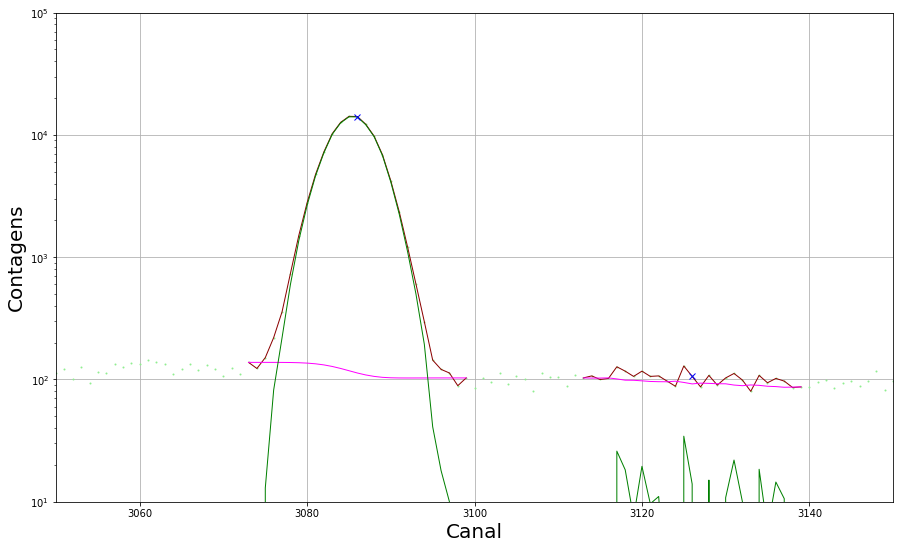

In [13]:
plota (xs, cts_spc, lx, ly, blins, nety, indics, heis, xlim=(3050, 3150), ylim=(1e1, 1e5) )

In [14]:
# factor for gaussian with fwhm
fgf = 4.0 * np.log(2.0)
fgf

2.772588722239781

In [15]:
def gaussian_fw(x,*p):
    ng = int( len(p) / 3)
    a = 0.0
    for i in range(ng):
        fw, he, cn = p[3*i+0], p[3*i+1], p[3*i+2]
        a += he*np.exp(-fgf*(x-cn)**2/fw**2)
    return a

In [16]:
flatten = lambda l: [item for sublist in l for item in sublist]

In [17]:
lx_nonegat = []
nety_nonegat = []
sigma_nety = []
for i in range(len(lx[3])):
    if nety[3][i] > 0.0:
        lx_nonegat.append(lx[3][i])
        nety_nonegat.append(nety[3][i])
        sigma_nety.append(np.sqrt(nety[3][i]))
# (lx_nonegat,nety_nonegat,sigma_nety)

In [18]:
def no_negats(i, lx, nety):
    lx_nonegat = []
    nety_nonegat = []
    sigma_nety = []
    for j in range(len(lx[i])):
        if nety[i][j] > 0.0:
            lx_nonegat.append(lx[i][j])
            nety_nonegat.append(nety[i][j])
            sigma_nety.append(np.sqrt(nety[i][j]))
    return lx_nonegat, nety_nonegat, sigma_nety

In [19]:
xs

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 8.193e+03, 8.194e+03,
       8.195e+03])

In [20]:
# Outra versao, usando fwhm
first_general_fit_fw = []
ini_fwhm = 6.0
for i in range(len(multis)):
    print(i)
    ipks = [j-regions[i][0] for j in multis[i]]
    multi_heis = [nety[i][ipk] for ipk in ipks]
    inipars = [[ini_fwhm, i2,i3] for i2,i3 in zip(multi_heis, multis[i])]
    iniflat = flatten(inipars)
    #if len(lx_nonegat) < 3:
    #    print('Error: few points to fit.')
    #    break
    lx_nonegat, nety_nonegat, sigma_nety = no_negats(i, lx, nety)
    len_lx_nonegat = len(lx_nonegat)
    print('Length of lx_nonegat: ', len_lx_nonegat)
    fittd = True
    if len_lx_nonegat < 4:
        print('Error: few points to fit.')
        fittd = False
    else:
        try:
            popt_gauss1, pcov_gauss1 = curve_fit(gaussian_fw, lx_nonegat, nety_nonegat, sigma=sigma_nety, p0=iniflat)
        except RuntimeError:
            fittd = False
            print("Error: curve_fit failed.")
        if fittd:
            print(popt_gauss1)
            if np.inf in pcov_gauss1:
                print('Matriz de covariancia ruim.')
            else:
                print('Ajuste Ok.')
                first_general_fit_fw.append( [lx_nonegat, nety_nonegat, popt_gauss1, pcov_gauss1] )
    print('-----------------------------')

0
Length of lx_nonegat:  41
Error: curve_fit failed.
-----------------------------
1
Length of lx_nonegat:  20
[   4.1352072  3195.8661026   236.36089566]
Ajuste Ok.
-----------------------------
2
Length of lx_nonegat:  20
[   3.96645789 2251.94181157  270.2616792 ]
Ajuste Ok.
-----------------------------
3
Length of lx_nonegat:  46
[ 4.61029775e+00  1.36853056e+04  3.79466321e+02  4.06554160e+00
 -9.61350776e+03  3.93258277e+02  5.09700277e+00  2.96735947e+04
  3.91581030e+02  4.68645885e+00  2.04441059e+03  4.02065081e+02]
Ajuste Ok.
-----------------------------
4
Length of lx_nonegat:  29
[ 5.29454084e+00  6.53143309e+03  4.42051221e+02  1.71536141e+01
 -1.00979038e+03  4.85893697e+00  4.65574129e+00  2.61265562e+03
  4.55510505e+02]
Matriz de covariancia ruim.
-----------------------------
5
Length of lx_nonegat:  14
[  1.661353   100.99718011 704.40263889]
Ajuste Ok.
-----------------------------
6
Length of lx_nonegat:  13
[  6.64282468  33.1313021  793.80395218]
Ajuste Ok.
--

/home/maduar/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[-2.35979010e+01  2.37136727e+01  9.44997898e+02  4.79129427e+00
  5.42567001e+03  9.43300430e+02  7.69443573e-01 -2.94372857e+01
  9.54518309e+02  2.26068568e+01  2.22611564e+01  9.88034315e+02
  2.64576302e+00  8.14575675e+01  9.93766221e+02]
Ajuste Ok.
-----------------------------
8
Length of lx_nonegat:  37
[-1.66723746e+01  2.18254308e+01  1.19052842e+03  4.54457326e+00
  1.03436030e+03  1.20855110e+03  5.16196710e+00  8.06832070e+03
  1.22558733e+03]
Ajuste Ok.
-----------------------------
9
Length of lx_nonegat:  16
[   5.28824981  518.34199144 1311.23625999]
Ajuste Ok.
-----------------------------
10
Length of lx_nonegat:  18
[   6.95932507  300.9802025  1390.7854713 ]
Ajuste Ok.
-----------------------------
11
Length of lx_nonegat:  20
[5.35171745e+00 1.63360106e+04 1.49492491e+03]
Ajuste Ok.
-----------------------------
12
Length of lx_nonegat:  4
[   3.0837409    16.22788946 1727.78154676]
Ajuste Ok.
-----------------------------
13
Length of lx_nonegat:  20
[5.61153088

In [21]:
#  Versao com fw em vez de sh
list_fwhms = []
list_channs = []
list_unc_fwhms = []
for i in range(len(first_general_fit_fw)):
    parms, cov_parms = first_general_fit_fw[i][2:4] 
    fwhms_inds = [j*3 for j in range(len(parms)//3)]
    fwhms = [parms[j] for j in fwhms_inds]
    unc_fwhms = [np.sqrt(cov_parms[j,j]) for j in fwhms_inds]
    channs_inds = [j*3+2 for j in range(len(parms)//3)]
    channs = [parms[j] for j in channs_inds]
    unc_channs = [np.sqrt(cov_parms[j,j]) for j in channs_inds]
    for k in range(len(fwhms)):
        if fwhms[k] > 0.0 and unc_fwhms[k]/fwhms[k] < 0.15:
            list_channs.append(channs[k])
            list_fwhms.append(fwhms[k])
            list_unc_fwhms.append(unc_fwhms[k])

In [22]:
channs=np.array(list_channs)
fwhms=np.array(list_fwhms)
unc_fwhms=np.array(list_unc_fwhms)
sqrt_channs = np.sqrt(channs)
weis = np.array(unc_fwhms)**-2
coeff_fwhm_fit, covar_fwhm_fit = np.polyfit(sqrt_channs, fwhms, deg=1, w=weis, cov=True)
poly1 = np.poly1d(coeff_fwhm_fit)
fit1 = poly1(sqrt_channs)

coeff_fwhm_fit, covar_fwhm_fit, fit1

(array([0.09169161, 1.77766031]), array([[ 2.52126925e-06, -1.21724772e-04],
        [-1.21724772e-04,  6.01191993e-03]]), array([ 3.18733011,  3.28503708,  3.56380321,  3.5920911 ,  3.61622012,
         4.59380264,  4.96524765,  4.98763579,  5.09790476,  5.19713707,
         5.32284834,  5.64826436,  6.17774703,  6.2128367 ,  6.29972016,
         6.32973068,  6.44013191,  6.74767033,  6.87079671,  7.49752269,
         7.56234375,  7.59066935,  7.63662808,  7.68993427,  7.75448787,
         8.08452604,  8.18559721,  8.20169724,  8.68576463,  8.79143965,
         9.03991479,  9.45991277,  9.87316009,  9.8860791 ,  9.99111384,
        10.01878352]))

In [23]:
unc_fwhms, weis

(array([0.10604763, 0.11314764, 0.10918141, 0.61428365, 0.40534344,
        0.07468659, 0.13511985, 0.04352587, 0.32530408, 0.43527354,
        0.05600556, 0.02254538, 0.33681189, 0.72509353, 0.42683563,
        0.78541994, 0.83351355, 0.43059479, 0.02232954, 0.09733711,
        0.18922077, 1.68186548, 0.2209771 , 1.58286235, 0.34078212,
        0.27039347, 0.62643055, 0.62973673, 1.28746099, 1.06223145,
        0.28782738, 0.43394449, 1.2991382 , 1.12898791, 0.9342122 ,
        1.29888449]),
 array([8.89197238e+01, 7.81104300e+01, 8.38885316e+01, 2.65009897e+00,
        6.08630499e+00, 1.79272956e+02, 5.47723890e+01, 5.27843468e+02,
        9.44976447e+00, 5.27807385e+00, 3.18814207e+02, 1.96736538e+03,
        8.81505810e+00, 1.90200628e+00, 5.48881586e+00, 1.62104903e+00,
        1.43937739e+00, 5.39339781e+00, 2.00558163e+03, 1.05546318e+02,
        2.79294493e+01, 3.53522847e-01, 2.04788453e+01, 3.99129382e-01,
        8.61085741e+00, 1.36775277e+01, 2.54832102e+00, 2.52163344e+00

In [24]:
weis, fwhms

(array([8.89197238e+01, 7.81104300e+01, 8.38885316e+01, 2.65009897e+00,
        6.08630499e+00, 1.79272956e+02, 5.47723890e+01, 5.27843468e+02,
        9.44976447e+00, 5.27807385e+00, 3.18814207e+02, 1.96736538e+03,
        8.81505810e+00, 1.90200628e+00, 5.48881586e+00, 1.62104903e+00,
        1.43937739e+00, 5.39339781e+00, 2.00558163e+03, 1.05546318e+02,
        2.79294493e+01, 3.53522847e-01, 2.04788453e+01, 3.99129382e-01,
        8.61085741e+00, 1.36775277e+01, 2.54832102e+00, 2.52163344e+00,
        6.03297936e-01, 8.86261099e-01, 1.20707930e+01, 5.31045399e+00,
        5.92501281e-01, 7.84551429e-01, 1.14580029e+00, 5.92732768e-01]),
 array([ 4.1352072 ,  3.96645789,  4.61029775,  5.09700277,  4.68645885,
         4.79129427,  4.54457326,  5.1619671 ,  5.28824981,  6.95932507,
         5.35171745,  5.61153088,  5.70322857,  8.07712099,  5.54929774,
         7.41550929, 12.37347568,  6.27535811,  6.88682614,  7.60932464,
         8.79704749, 12.25074079,  7.06817945, 11.97249434

In [25]:
channs

array([ 236.36089566,  270.2616792 ,  379.46632086,  391.58103049,
        402.06508149,  943.30042994, 1208.55110285, 1225.58732502,
       1311.23625999, 1390.7854713 , 1494.92491302, 1781.96153674,
       2302.83755635, 2339.71319775, 2432.27930198, 2464.66992533,
       2585.67079379, 2938.02414528, 3085.39979284, 3891.4548035 ,
       3980.15537524, 4019.22971381, 4083.0344957 , 4157.66918589,
       4248.95648738, 4731.16399516, 4884.01832432, 4908.59148297,
       5676.21198287, 5851.20115197, 6273.12234681, 7019.69077656,
       7795.21614816, 7820.1156135 , 8024.02807833, 8078.18222218])

In [26]:
# Definindo fun,c~ao com fwhms fixos
def gaus_fix_fw(*fws):
    def g2(x, *hescns): # HEightS, COuntS
        pcompl = np.array([])
        ng = int( len(hescns) / 2)
        for i in range(ng):
            pcompl = np.append(pcompl, (fws[i], hescns[2*i+0], hescns[2*i+1]))
        return gaussian_fw(x,*pcompl)
    return g2

In [27]:
second_general_fit = []
for i in range(len(first_general_fit_fw)):
    # 2018-07-02
    # AQUI: fazer a segunda passada do ajuste, usando agora fwhms fixos.
    # Todos os dados estao na lista first_general_fit_fw
    ipks = len(first_general_fit_fw[i][2])//3
    print('#',i,': ','peaks: ', ipks)
    xs2 = first_general_fit_fw[i][0]
    ys2 = first_general_fit_fw[i][1]
    teste1 = first_general_fit_fw[i][2]
    fwstest = []
    hestest = []
    cnstest = []
    [fwstest.append(teste1[3*j]) for j in range(len(teste1)//3)]
    [hestest.append(teste1[3*j+1]) for j in range(len(teste1)//3)]
    [cnstest.append(teste1[3*j+2]) for j in range(len(teste1)//3)]
    fws_fit = poly1(np.sqrt(cnstest))
    p0=[]
    [p0.extend((j1, j2)) for j1,j2 in zip(hestest, cnstest)]
    print('fws_fit: ', fws_fit)
    print('p0: ', p0)
    fittd = True
    try:
        popt2, pcov2 = curve_fit(gaus_fix_fw(*fws_fit), xs2, ys2, p0=p0)
    except RuntimeError:
        fittd = False
        print("Error: curve_fit failed.")
    if fittd:
        print('popt2: ', popt2)
        if np.inf in pcov2:
            print('Matriz de covariancia ruim.')
        else:
            print('Ajuste Ok.')
            second_general_fit.append( [xs2, ys2, fws_fit, popt2, pcov2] )
    print('-----------------------------')
# second_general_fit

# 0 :  peaks:  1
fws_fit:  [3.18733011]
p0:  [3195.866102602346, 236.36089566347565]
popt2:  [3569.54876388  236.38996385]
Ajuste Ok.
-----------------------------
# 1 :  peaks:  1
fws_fit:  [3.28503708]
p0:  [2251.941811565876, 270.26167919967526]
popt2:  [2428.57504847  270.15855821]
Ajuste Ok.
-----------------------------
# 2 :  peaks:  4
fws_fit:  [3.56380321 3.59597279 3.5920911  3.61622012]
p0:  [13685.305589647807, 379.4663208584113, -9613.507762805948, 393.2582774659104, 29673.594699035402, 391.5810304911541, 2044.4105850701228, 402.065081485335]
popt2:  [15510.336823     379.48594427 16938.14057253   391.89942388
 13577.94679312   389.83544029  2325.85320835   402.06273144]
Ajuste Ok.
-----------------------------
# 3 :  peaks:  1
fws_fit:  [4.21120917]
p0:  [100.99718010535219, 704.4026388937463]
popt2:  [ 39.87703069 704.60797939]
Ajuste Ok.
-----------------------------
# 4 :  peaks:  1
fws_fit:  [4.36102793]
p0:  [33.13130209805476, 793.8039521770511]
popt2:  [ 70.3908851

In [28]:
xtest1 = second_general_fit[5][0] 
ytest1 = second_general_fit[5][1] 
par1 = second_general_fit[5][2]
par2 = second_general_fit[5][3]
func_y_fit2 = gaus_fix_fw(*par1)
y_fit3 = gaus_fix_fw(*par1)(xtest1, *par2)

In [29]:
np.linspace(7.7, 13.9, num=int(np.around(13.9-7.7))+1)

array([ 7.7       ,  8.73333333,  9.76666667, 10.8       , 11.83333333,
       12.86666667, 13.9       ])

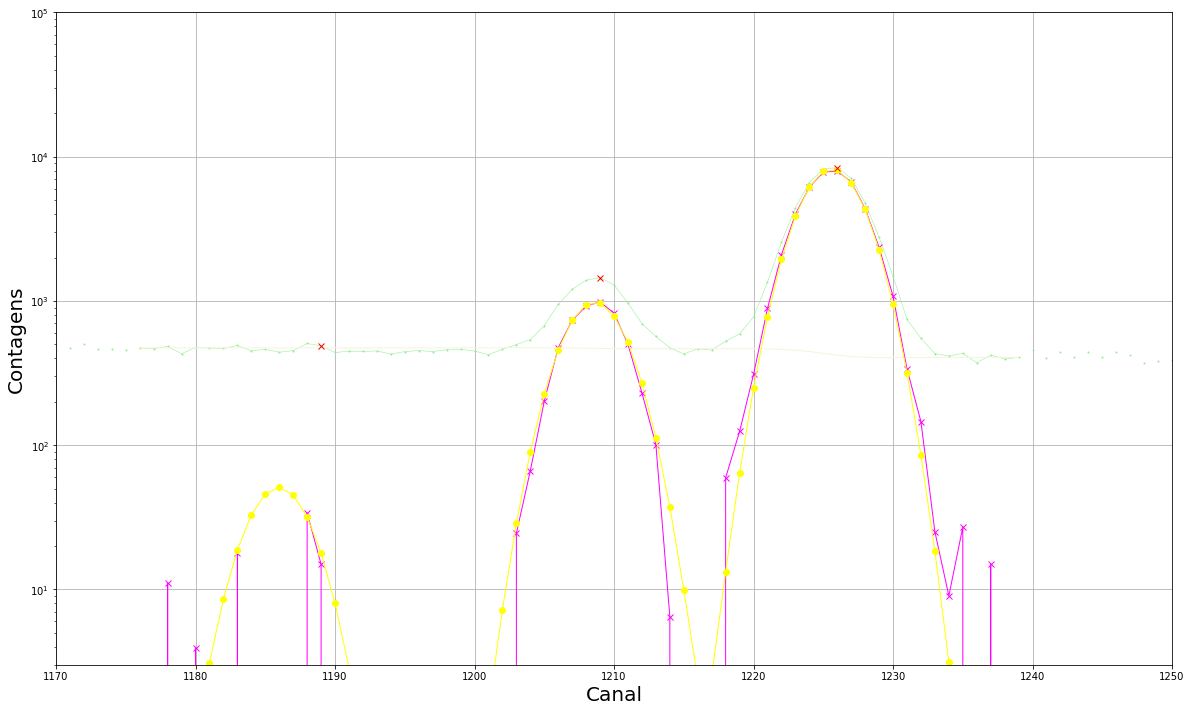

In [30]:
plt.close('all')
fig1, ax1 = plt.subplots(1, 1, figsize=(20,12))
ax1.grid(True)
ax1.set_xlim(1170, 1250)
ax1.set_ylim(3.0, 1e5)
ax1.set_xlabel('Canal', size=20)
ax1.set_ylabel('Contagens', size=20)
ax1.semilogy(xs, cts_spc, marker='.', markersize=2.0, color='lightgreen', linestyle='None')
dummy = [ ax1.semilogy(xs, ys, marker='', color='lightgreen', linewidth=0.5) for xs,ys in zip(lx,ly) ]
dummy = [ ax1.semilogy(xs, ys, marker='', color='beige', linewidth=1.0) for xs,ys in zip(lx,blins) ]
dummy = [ ax1.semilogy(xs, ys, marker='x', color='magenta', linewidth=1.0) for xs,ys in zip(lx,nety) ]

# 2018-Jul-03: Falta fazer a soma blin com o ajuste:
# dummy = [ ax1.semilogy(z[0], gaus_fix_fw(*z[2])(z[0], *z[3]), marker='o', color='blue', linewidth=1.0) for z in second_general_fit ]
# Usando linspace: usar pontos extremos de z[0] para construir a faixa
for z in second_general_fit:
    xra = np.linspace(z[0][0], z[0][-1], num=int(np.around(z[0][-1]-z[0][0]))+1)
    ax1.semilogy(xra, gaus_fix_fw(*z[2])(xra, *z[3]), marker='o', color='yellow', linewidth=1.0)
dummy = [ ax1.semilogy(xs, ys, marker='x', color='red', linestyle='None') for xs,ys in zip(indics,heis) ]

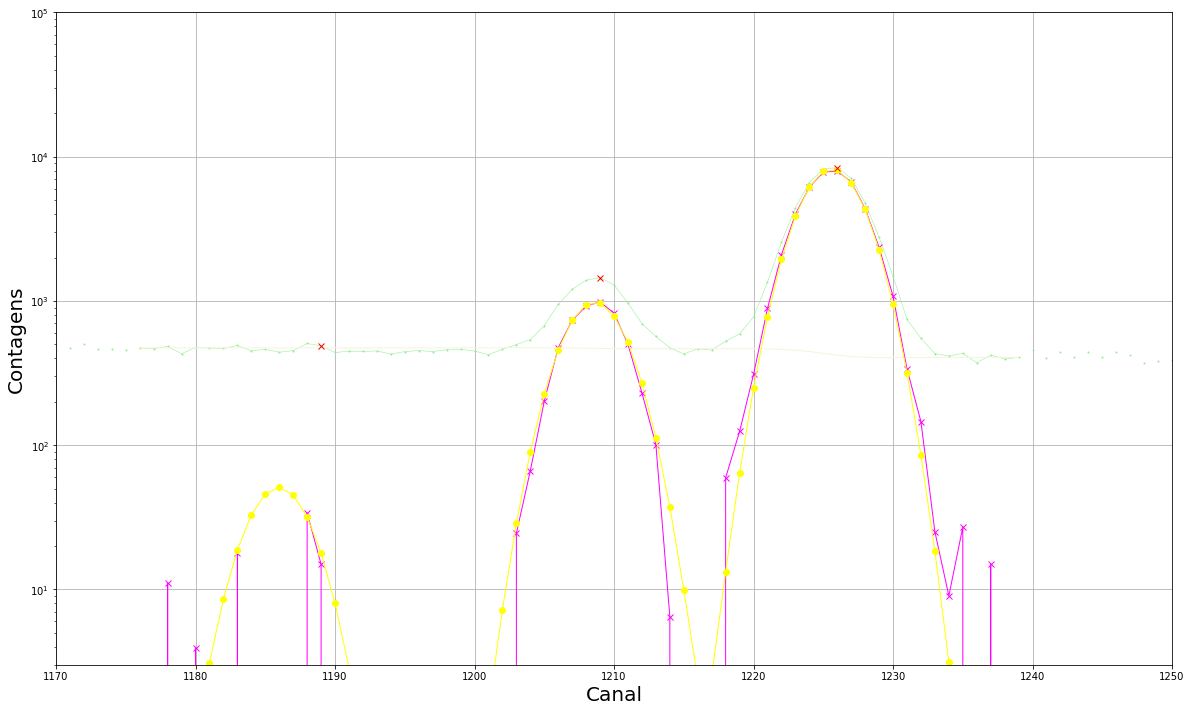

In [31]:
fig1

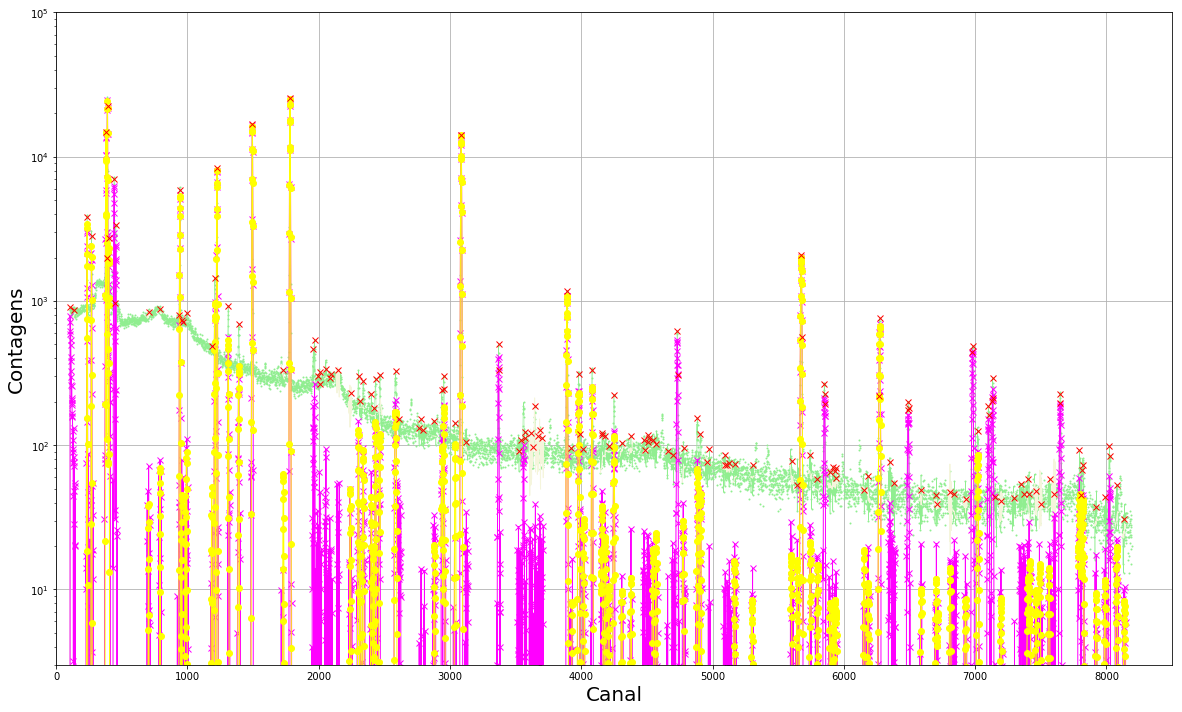

In [32]:
plt.close('all')
fig1, ax1 = plt.subplots(1, 1, figsize=(20,12))
ax1.grid(True)
ax1.set_xlim(0, 8500)
ax1.set_ylim(3.0, 1e5)
ax1.set_xlabel('Canal', size=20)
ax1.set_ylabel('Contagens', size=20)
ax1.semilogy(xs, cts_spc, marker='.', markersize=2.0, color='lightgreen', linestyle='None')
dummy = [ ax1.semilogy(xs, ys, marker='', color='lightgreen', linewidth=0.5) for xs,ys in zip(lx,ly) ]
dummy = [ ax1.semilogy(xs, ys, marker='', color='beige', linewidth=1.0) for xs,ys in zip(lx,blins) ]
dummy = [ ax1.semilogy(xs, ys, marker='x', color='magenta', linewidth=1.0) for xs,ys in zip(lx,nety) ]

# 2018-Jul-03: Falta fazer a soma blin com o ajuste:
# dummy = [ ax1.semilogy(z[0], gaus_fix_fw(*z[2])(z[0], *z[3]), marker='o', color='blue', linewidth=1.0) for z in second_general_fit ]
# Usando linspace: usar pontos extremos de z[0] para construir a faixa
for z in second_general_fit:
    xra = np.linspace(z[0][0], z[0][-1], num=int(np.around(z[0][-1]-z[0][0]))+1)
    ax1.semilogy(xra, gaus_fix_fw(*z[2])(xra, *z[3]), marker='o', color='yellow', linewidth=1.0)
dummy = [ ax1.semilogy(xs, ys, marker='x', color='red', linestyle='None') for xs,ys in zip(indics,heis) ]

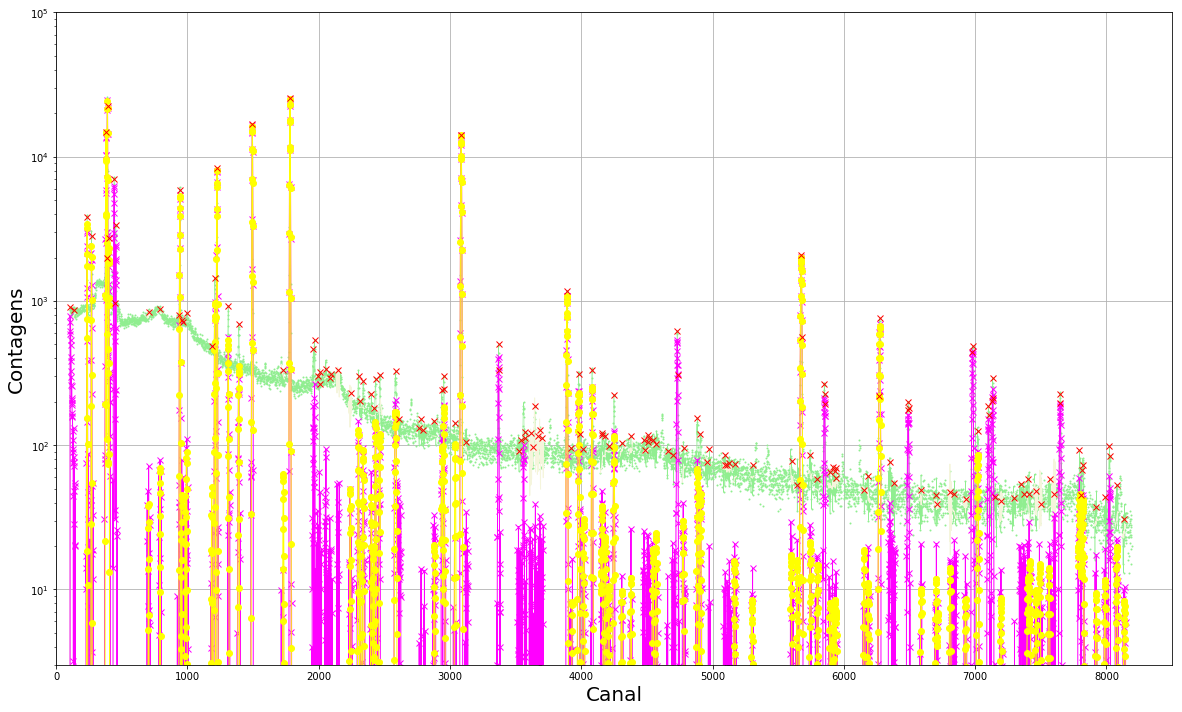

In [33]:
fig1

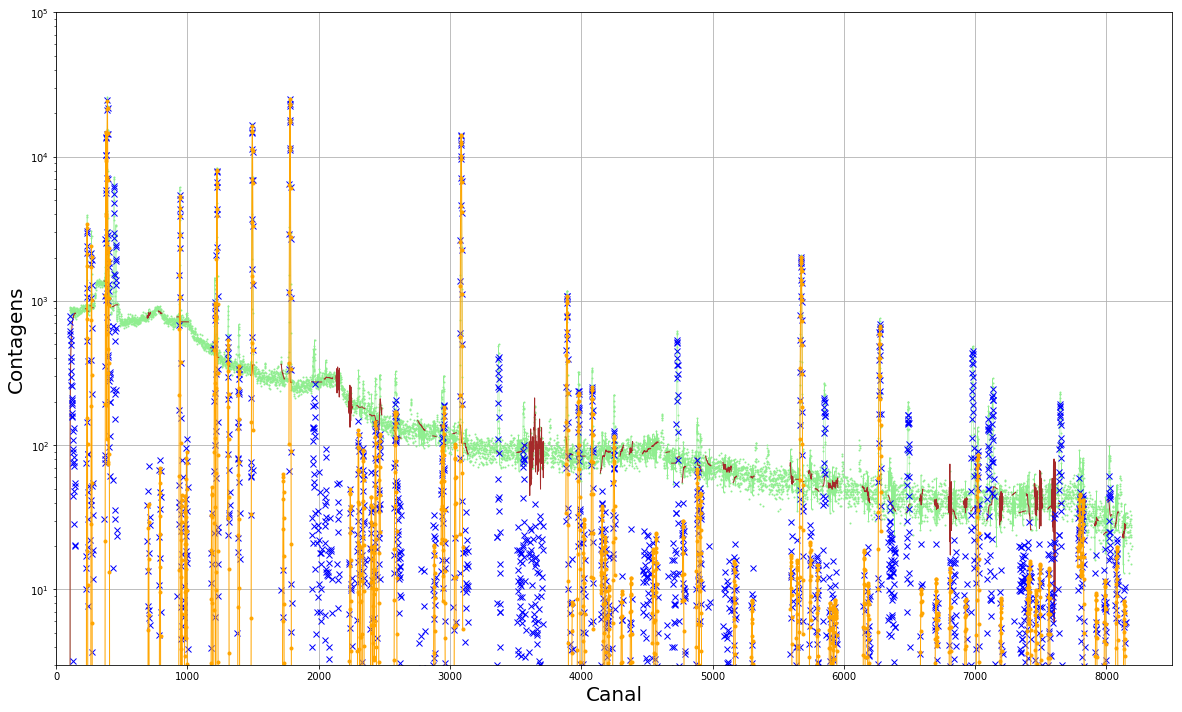

In [34]:
plt.close('all')
fig1, ax1 = plt.subplots(1, 1, figsize=(20,12))
ax1.grid(True)
ax1.set_xlim(0, 8500)
ax1.set_ylim(3.0, 1e5)
ax1.set_xlabel('Canal', size=20)
ax1.set_ylabel('Contagens', size=20)
ax1.semilogy(xs, cts_spc, marker='.', markersize=2.0, color='lightgreen', linestyle='None')
dummy = [ ax1.semilogy(xs, ys, marker='', color='lightgreen', linewidth=0.5) for xs,ys in zip(lx,ly) ]
dummy = [ ax1.semilogy(xs, ys, marker='', color='brown', linewidth=1.0) for xs,ys in zip(lx,blins) ]
dummy = [ ax1.semilogy(xs, ys, marker='x', color='blue', linestyle='None') for xs,ys in zip(lx,nety) ]

# 2018-Jul-03: Falta fazer a soma blin com o ajuste:
# dummy = [ ax1.semilogy(z[0], gaus_fix_fw(*z[2])(z[0], *z[3]), marker='o', color='blue', linewidth=1.0) for z in second_general_fit ]
# Usando linspace: usar pontos extremos de z[0] para construir a faixa
for z in second_general_fit:
    xra = np.linspace(z[0][0], z[0][-1], num=int(np.around(z[0][-1]-z[0][0]))+1)
    ax1.semilogy(xra, gaus_fix_fw(*z[2])(xra, *z[3]), marker='.', color='orange', linewidth=1.0)
# dummy = [ ax1.semilogy(xs, ys, marker='x', color='red', linestyle='None') for xs,ys in zip(indics,heis) ]

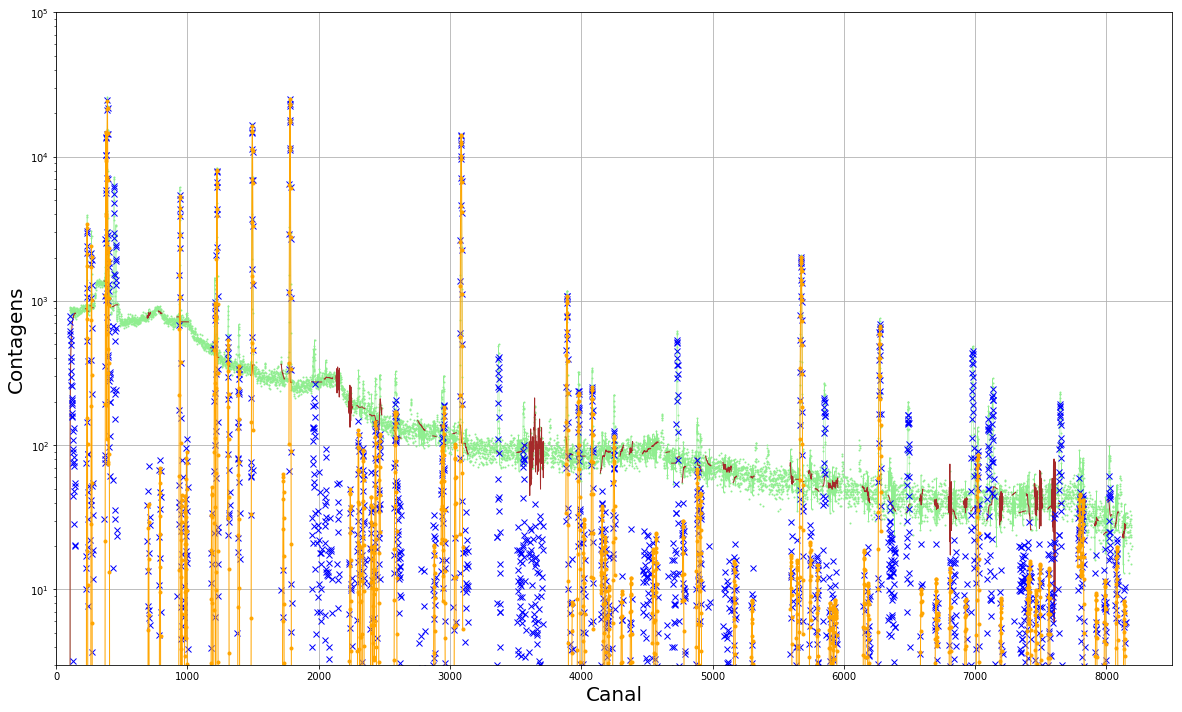

In [35]:
fig1

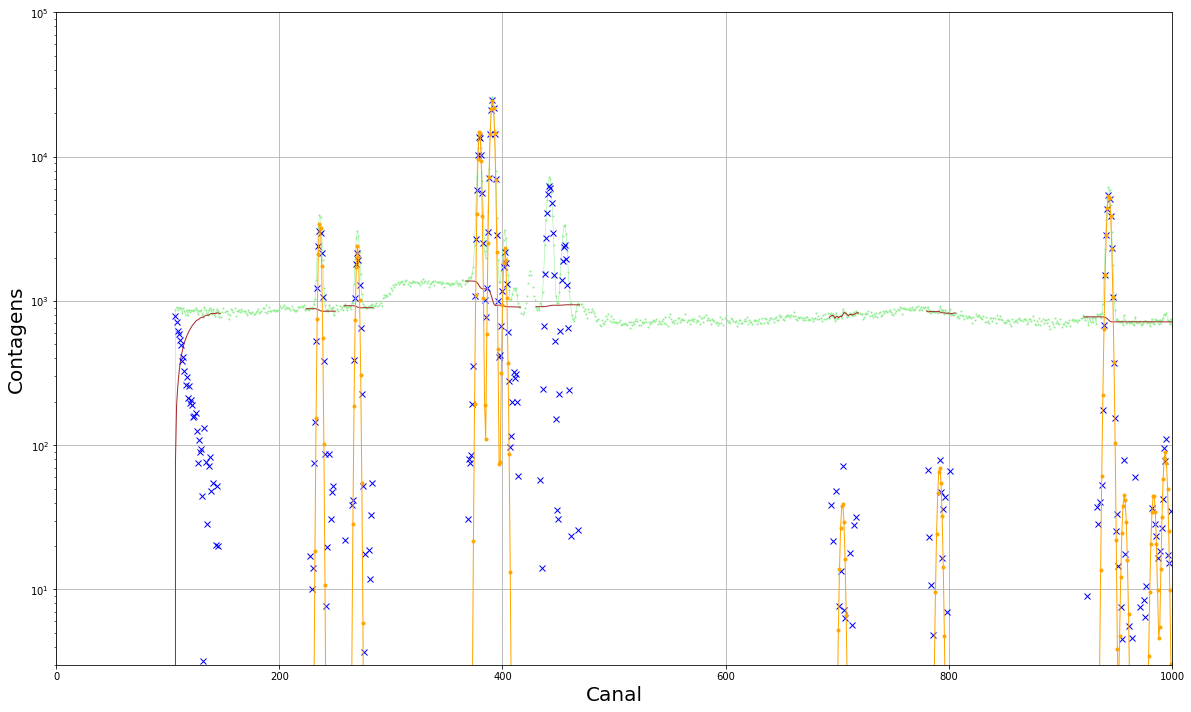

In [36]:
plt.close('all')
fig1, ax1 = plt.subplots(1, 1, figsize=(20,12))
ax1.grid(True)
ax1.set_xlim(0, 1000)
ax1.set_ylim(3.0, 1e5)
ax1.set_xlabel('Canal', size=20)
ax1.set_ylabel('Contagens', size=20)
ax1.semilogy(xs, cts_spc, marker='.', markersize=2.0, color='lightgreen', linestyle='None')
dummy = [ ax1.semilogy(xs, ys, marker='', color='lightgreen', linewidth=0.5) for xs,ys in zip(lx,ly) ]
dummy = [ ax1.semilogy(xs, ys, marker='', color='brown', linewidth=1.0) for xs,ys in zip(lx,blins) ]
dummy = [ ax1.semilogy(xs, ys, marker='x', color='blue', linestyle='None') for xs,ys in zip(lx,nety) ]

# 2018-Jul-03: Falta fazer a soma blin com o ajuste:
# dummy = [ ax1.semilogy(z[0], gaus_fix_fw(*z[2])(z[0], *z[3]), marker='o', color='blue', linewidth=1.0) for z in second_general_fit ]
# Usando linspace: usar pontos extremos de z[0] para construir a faixa
for z in second_general_fit:
    xra = np.linspace(z[0][0], z[0][-1], num=int(np.around(z[0][-1]-z[0][0]))+1)
    ax1.semilogy(xra, gaus_fix_fw(*z[2])(xra, *z[3]), marker='.', color='orange', linewidth=1.0)
# dummy = [ ax1.semilogy(xs, ys, marker='x', color='red', linestyle='None') for xs,ys in zip(indics,heis) ]

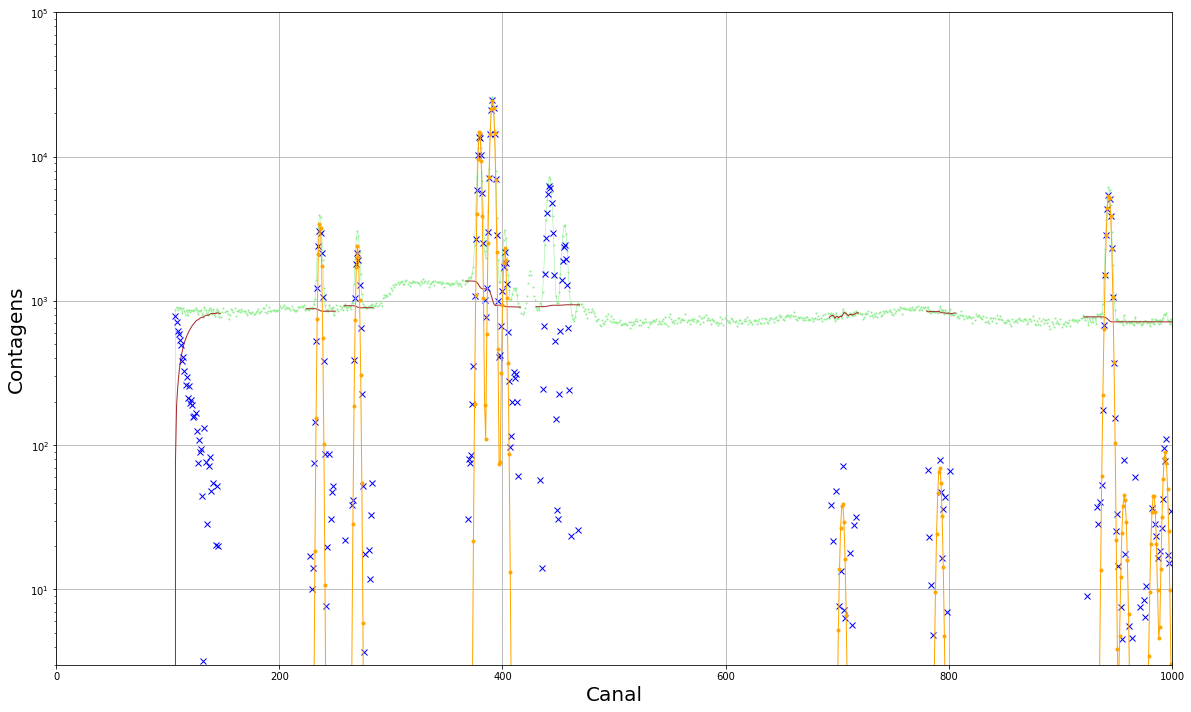

In [37]:
fig1

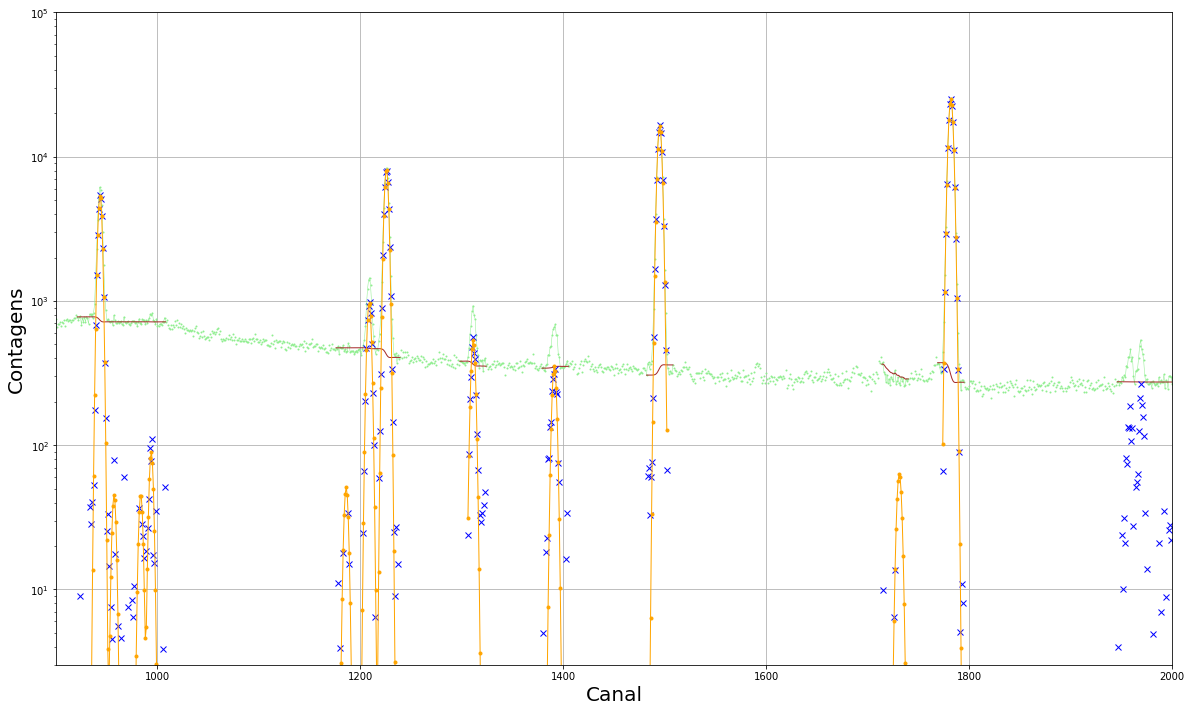

In [38]:
plt.close('all')
fig1, ax1 = plt.subplots(1, 1, figsize=(20,12))
ax1.grid(True)
ax1.set_xlim(900, 2000)
ax1.set_ylim(3.0, 1e5)
ax1.set_xlabel('Canal', size=20)
ax1.set_ylabel('Contagens', size=20)
ax1.semilogy(xs, cts_spc, marker='.', markersize=2.0, color='lightgreen', linestyle='None')
dummy = [ ax1.semilogy(xs, ys, marker='', color='lightgreen', linewidth=0.5) for xs,ys in zip(lx,ly) ]
dummy = [ ax1.semilogy(xs, ys, marker='', color='brown', linewidth=1.0) for xs,ys in zip(lx,blins) ]
dummy = [ ax1.semilogy(xs, ys, marker='x', color='blue', linestyle='None') for xs,ys in zip(lx,nety) ]

# 2018-Jul-03: Falta fazer a soma blin com o ajuste:
# dummy = [ ax1.semilogy(z[0], gaus_fix_fw(*z[2])(z[0], *z[3]), marker='o', color='blue', linewidth=1.0) for z in second_general_fit ]
# Usando linspace: usar pontos extremos de z[0] para construir a faixa
for z in second_general_fit:
    xra = np.linspace(z[0][0], z[0][-1], num=int(np.around(z[0][-1]-z[0][0]))+1)
    ax1.semilogy(xra, gaus_fix_fw(*z[2])(xra, *z[3]), marker='.', color='orange', linewidth=1.0)
# dummy = [ ax1.semilogy(xs, ys, marker='x', color='red', linestyle='None') for xs,ys in zip(indics,heis) ]

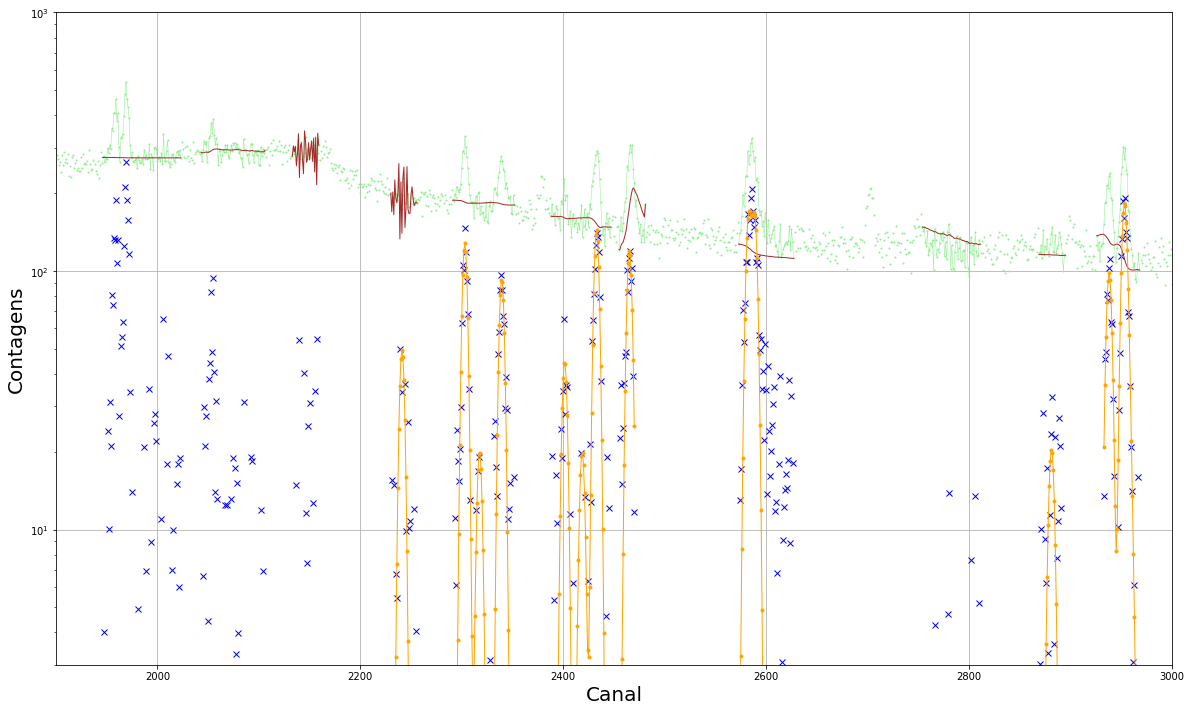

In [39]:
plt.close('all')
fig1, ax1 = plt.subplots(1, 1, figsize=(20,12))
ax1.grid(True)
ax1.set_xlim(1900, 3000)
ax1.set_ylim(3.0, 1e3)
ax1.set_xlabel('Canal', size=20)
ax1.set_ylabel('Contagens', size=20)
ax1.semilogy(xs, cts_spc, marker='.', markersize=2.0, color='lightgreen', linestyle='None')
dummy = [ ax1.semilogy(xs, ys, marker='', color='lightgreen', linewidth=0.5) for xs,ys in zip(lx,ly) ]
dummy = [ ax1.semilogy(xs, ys, marker='', color='brown', linewidth=1.0) for xs,ys in zip(lx,blins) ]
dummy = [ ax1.semilogy(xs, ys, marker='x', color='blue', linestyle='None') for xs,ys in zip(lx,nety) ]

# 2018-Jul-03: Falta fazer a soma blin com o ajuste:
# dummy = [ ax1.semilogy(z[0], gaus_fix_fw(*z[2])(z[0], *z[3]), marker='o', color='blue', linewidth=1.0) for z in second_general_fit ]
# Usando linspace: usar pontos extremos de z[0] para construir a faixa
for z in second_general_fit:
    xra = np.linspace(z[0][0], z[0][-1], num=int(np.around(z[0][-1]-z[0][0]))+1)
    ax1.semilogy(xra, gaus_fix_fw(*z[2])(xra, *z[3]), marker='.', color='orange', linewidth=1.0)
# dummy = [ ax1.semilogy(xs, ys, marker='x', color='red', linestyle='None') for xs,ys in zip(indics,heis) ]

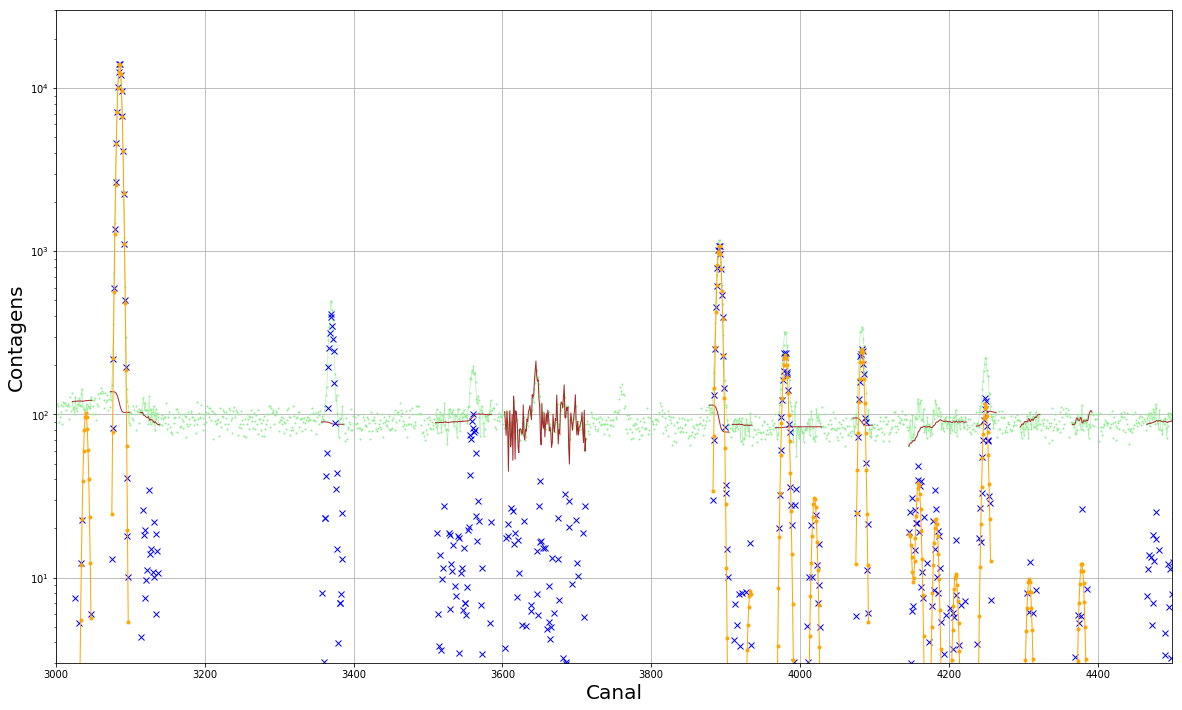

In [40]:
plt.close('all')
fig1, ax1 = plt.subplots(1, 1, figsize=(20,12))
ax1.grid(True)
ax1.set_xlim(3000, 4500)
ax1.set_ylim(3.0, 3e4)
ax1.set_xlabel('Canal', size=20)
ax1.set_ylabel('Contagens', size=20)
ax1.semilogy(xs, cts_spc, marker='.', markersize=2.0, color='lightgreen', linestyle='None')
dummy = [ ax1.semilogy(xs, ys, marker='', color='lightgreen', linewidth=0.5) for xs,ys in zip(lx,ly) ]
dummy = [ ax1.semilogy(xs, ys, marker='', color='brown', linewidth=1.0) for xs,ys in zip(lx,blins) ]
dummy = [ ax1.semilogy(xs, ys, marker='x', color='blue', linestyle='None') for xs,ys in zip(lx,nety) ]

# 2018-Jul-03: Falta fazer a soma blin com o ajuste:
# dummy = [ ax1.semilogy(z[0], gaus_fix_fw(*z[2])(z[0], *z[3]), marker='o', color='blue', linewidth=1.0) for z in second_general_fit ]
# Usando linspace: usar pontos extremos de z[0] para construir a faixa
for z in second_general_fit:
    xra = np.linspace(z[0][0], z[0][-1], num=int(np.around(z[0][-1]-z[0][0]))+1)
    ax1.semilogy(xra, gaus_fix_fw(*z[2])(xra, *z[3]), marker='.', color='orange', linewidth=1.0)
# dummy = [ ax1.semilogy(xs, ys, marker='x', color='red', linestyle='None') for xs,ys in zip(indics,heis) ]

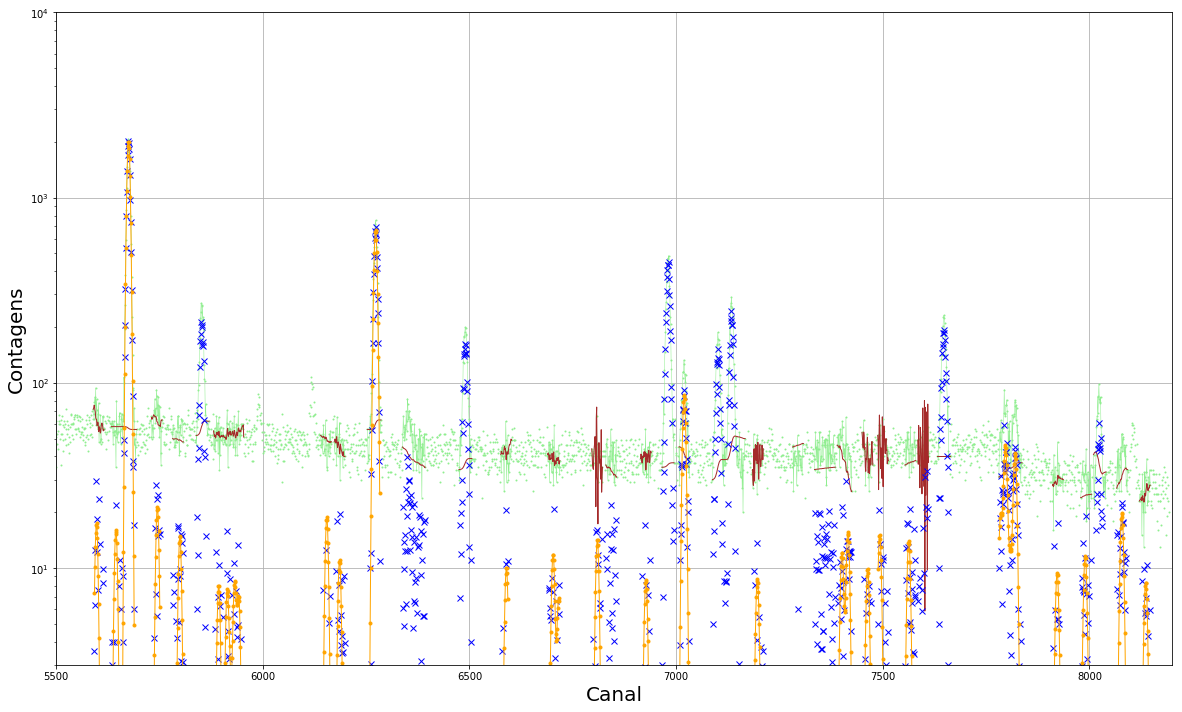

In [41]:
plt.close('all')
fig1, ax1 = plt.subplots(1, 1, figsize=(20,12))
ax1.grid(True)
ax1.set_xlim(5500, 8200)
ax1.set_ylim(3.0, 1e4)
ax1.set_xlabel('Canal', size=20)
ax1.set_ylabel('Contagens', size=20)
ax1.semilogy(xs, cts_spc, marker='.', markersize=2.0, color='lightgreen', linestyle='None')
dummy = [ ax1.semilogy(xs, ys, marker='', color='lightgreen', linewidth=0.5) for xs,ys in zip(lx,ly) ]
dummy = [ ax1.semilogy(xs, ys, marker='', color='brown', linewidth=1.0) for xs,ys in zip(lx,blins) ]
dummy = [ ax1.semilogy(xs, ys, marker='x', color='blue', linestyle='None') for xs,ys in zip(lx,nety) ]

# 2018-Jul-03: Falta fazer a soma blin com o ajuste:
# dummy = [ ax1.semilogy(z[0], gaus_fix_fw(*z[2])(z[0], *z[3]), marker='o', color='blue', linewidth=1.0) for z in second_general_fit ]
# Usando linspace: usar pontos extremos de z[0] para construir a faixa
for z in second_general_fit:
    xra = np.linspace(z[0][0], z[0][-1], num=int(np.around(z[0][-1]-z[0][0]))+1)
    ax1.semilogy(xra, gaus_fix_fw(*z[2])(xra, *z[3]), marker='.', color='orange', linewidth=1.0)
# dummy = [ ax1.semilogy(xs, ys, marker='x', color='red', linestyle='None') for xs,ys in zip(indics,heis) ]

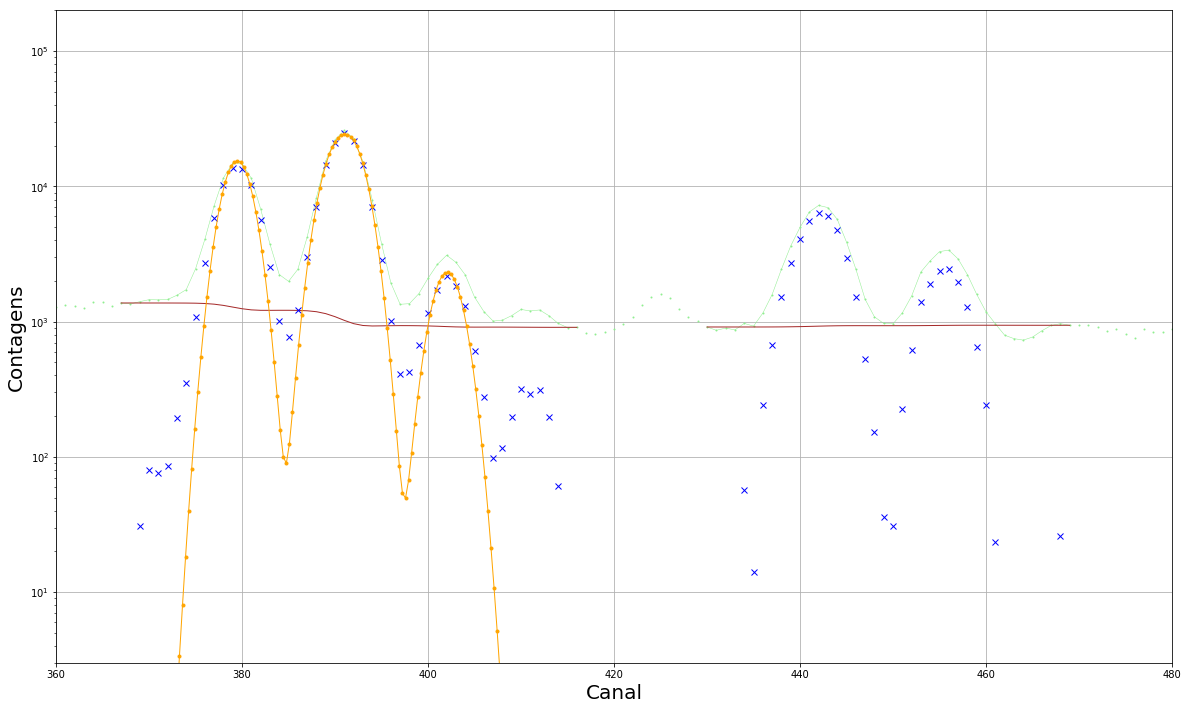

In [42]:
plt.close('all')
fig1, ax1 = plt.subplots(1, 1, figsize=(20,12))
ax1.grid(True)
ax1.set_xlim(360, 480)
ax1.set_ylim(3.0, 2e5)
ax1.set_xlabel('Canal', size=20)
ax1.set_ylabel('Contagens', size=20)
ax1.semilogy(xs, cts_spc, marker='.', markersize=2.0, color='lightgreen', linestyle='None')
dummy = [ ax1.semilogy(xs, ys, marker='', color='lightgreen', linewidth=0.5) for xs,ys in zip(lx,ly) ]
dummy = [ ax1.semilogy(xs, ys, marker='', color='brown', linewidth=1.0) for xs,ys in zip(lx,blins) ]
dummy = [ ax1.semilogy(xs, ys, marker='x', color='blue', linestyle='None') for xs,ys in zip(lx,nety) ]

# 2018-Jul-03: Falta fazer a soma blin com o ajuste:
# dummy = [ ax1.semilogy(z[0], gaus_fix_fw(*z[2])(z[0], *z[3]), marker='o', color='blue', linewidth=1.0) for z in second_general_fit ]
# Usando linspace: usar pontos extremos de z[0] para construir a faixa
for z in second_general_fit:
    xra = np.linspace(z[0][0], z[0][-1], num=(int(np.around(z[0][-1]-z[0][0]))+1) * 3  )
    ax1.semilogy(xra, gaus_fix_fw(*z[2])(xra, *z[3]), marker='.', color='orange', linewidth=1.0)
# dummy = [ ax1.semilogy(xs, ys, marker='x', color='red', linestyle='None') for xs,ys in zip(indics,heis) ]

In [43]:
# 2018-Jul-10
# Fazendo linha-base total!!!

In [44]:
def total_base_line(filename):
    cts_spc, lt_spc, rt_spc = readiecsp(filename)
    # blins = [bline_estimate_2(ys) for ys in ly ]
    # nety = [ [ gr-bl for gr, bl in zip(l1,l2) ] for l1,l2 in zip(ly,blins) ]
    return cts_spc, lt_spc, rt_spc

In [45]:
##### AQUI DEFINO O ESPECTRO

In [46]:
sp_name = '../gamma/spectra/ALMERA-2017-3/ALM-17-3-#5_PreliA.IEC'
# sp_name = '../gamma/spectra/Diversos/CTP1508.IEC'

In [47]:
cts_spc, lt_spc, rt_spc = \
    blf.total_base_line(sp_name)
len(cts_spc)

AttributeError: module 'base_line_funcs' has no attribute 'total_base_line'

In [ ]:
n = len(cts_spc)
ww = 30
# TOtal BAse Line
tobali1 = np.inf * np.ones(n)
for i in range(n-ww+1):
    w_bl = bline_estimate (cts_spc[i:i+ww])
    tobali1[i:i+ww] = np.minimum (tobali1[i:i+ww], w_bl)

In [ ]:
n = len(cts_spc)
ww = 30
# TOtal BAse Line
tobali2 = np.inf * np.ones(n)
for i in range(n-ww+1):
    w_bl = bline_estimate_2 (cts_spc[i:i+ww])
    tobali2[i:i+ww] = np.minimum (tobali2[i:i+ww], w_bl)

In [ ]:
n = len(cts_spc)
ww = 50
# TOtal BAse Line
tobali3 = np.inf * np.ones(n)
for i in range(n-ww):
    w_bl = np.linspace(cts_spc[i], cts_spc[i+ww], num=ww)
    # w_bl = cts_spc[i:i+ww]
    tobali3[i:i+ww] = np.minimum (tobali3[i:i+ww], w_bl)

In [ ]:
# 2018-Jul-10
# TOtal BAseLIne 4 !
# Este 'e, at'e agora, o melhor algoritmo para determinar a linha-base!!!!
# Os melhores par^ametros parecem ser, para espectro de 8k:
# ww=51 e hwm=3.
#
n = len(cts_spc)
# window width
ww = 51
# TOtal BAse Line
tobali4 = np.inf * np.ones(n)
# half-window for mean
hwm = 3
#
for i in range(n-ww-hwm+1):
    w_bl = np.linspace(np.mean(cts_spc[i-hwm:i+hwm+1]), np.mean(cts_spc[i+ww-hwm:i+ww+hwm+1]), num=ww)
    tobali4[i:i+ww] = np.minimum (tobali4[i:i+ww], w_bl)

In [ ]:
# tobali1
plt.close('all')
fig1, ax1 = plt.subplots(1, 1, figsize=(15,9))
ax1.grid(True)
ax1.set_xlim(360, 480)
ax1.set_ylim(1e2, 1e5)
ax1.set_xlabel('Canal', size=20)
ax1.set_ylabel('Contagens', size=20)
ax1.semilogy(xs, cts_spc, marker='.', markersize=2.0, color='lightgreen', linestyle='None')
dummy = [ ax1.semilogy(xs, ys, marker='', color='lightgreen', linewidth=0.5) for xs,ys in zip(lx,ly) ]
dummy = ax1.semilogy(xs, tobali1, marker='', color='brown', linewidth=1.0)

In [ ]:
# tobali2
plt.close('all')
fig1, ax1 = plt.subplots(1, 1, figsize=(15,9))
ax1.grid(True)
ax1.set_xlim(360, 480)
ax1.set_ylim(1e2, 1e5)
ax1.set_xlabel('Canal', size=20)
ax1.set_ylabel('Contagens', size=20)
ax1.semilogy(xs, cts_spc, marker='.', markersize=2.0, color='lightgreen', linestyle='None')
dummy = [ ax1.semilogy(xs, ys, marker='', color='lightgreen', linewidth=0.5) for xs,ys in zip(lx,ly) ]
dummy = ax1.semilogy(xs, tobali2, marker='', color='brown', linewidth=1.0)

In [ ]:
# tobali3
plt.close('all')
fig1, ax1 = plt.subplots(1, 1, figsize=(15,9))
ax1.grid(True)
ax1.set_xlim(360, 480)
ax1.set_ylim(1e2, 1e5)
ax1.set_xlabel('Canal', size=20)
ax1.set_ylabel('Contagens', size=20)
ax1.semilogy(xs, cts_spc, marker='.', markersize=2.0, color='lightgreen', linestyle='None')
dummy = [ ax1.semilogy(xs, ys, marker='', color='lightgreen', linewidth=0.5) for xs,ys in zip(lx,ly) ]
dummy = ax1.semilogy(xs, tobali3, marker='', color='brown', linewidth=1.0)

In [ ]:
# tobali3
plt.close('all')
fig1, ax1 = plt.subplots(1, 1, figsize=(15,9))
ax1.grid(True)
ax1.set_xlim(1e3, 3e3)
ax1.set_ylim(1e2, 1e5)
ax1.set_xlabel('Canal', size=20)
ax1.set_ylabel('Contagens', size=20)
ax1.semilogy(xs, cts_spc, marker='.', markersize=2.0, color='lightgreen', linestyle='None')
dummy = [ ax1.semilogy(xs, ys, marker='', color='lightgreen', linewidth=0.5) for xs,ys in zip(lx,ly) ]
dummy = ax1.semilogy(xs, tobali3, marker='', color='brown', linewidth=1.0)

In [ ]:
# tobali4
plt.close('all')
fig1, ax1 = plt.subplots(1, 1, figsize=(15,9))
ax1.grid(True)
ax1.set_xlim(1e3, 3e3)
ax1.set_ylim(1e2, 1e5)
ax1.set_xlabel('Canal', size=20)
ax1.set_ylabel('Contagens', size=20)
ax1.semilogy(xs, cts_spc, marker='.', markersize=2.0, color='lightgreen', linestyle='None')
dummy = [ ax1.semilogy(xs, ys, marker='', color='lightgreen', linewidth=0.5) for xs,ys in zip(lx,ly) ]
dummy = ax1.semilogy(xs, tobali4, marker='', color='brown', linewidth=1.0)

In [ ]:
# tobali3
plt.close('all')
fig1, ax1 = plt.subplots(1, 1, figsize=(15,9))
ax1.grid(True)
ax1.set_xlim(5.5e3, 8.2e3)
ax1.set_ylim(3, 2e5)
ax1.set_xlabel('Canal', size=20)
ax1.set_ylabel('Contagens', size=20)
ax1.semilogy(xs, cts_spc, marker='.', markersize=2.0, color='lightgreen', linestyle='None')
dummy = [ ax1.semilogy(xs, ys, marker='', color='lightgreen', linewidth=0.5) for xs,ys in zip(lx,ly) ]
dummy = ax1.semilogy(xs, tobali3, marker='', color='brown', linewidth=1.0)

In [ ]:
# tobali4
plt.close('all')
fig1, ax1 = plt.subplots(1, 1, figsize=(15,9))
ax1.grid(True)
ax1.set_xlim(5.5e3, 8.2e3)
ax1.set_ylim(3, 2e5)
ax1.set_xlabel('Canal', size=20)
ax1.set_ylabel('Contagens', size=20)
ax1.semilogy(xs, cts_spc, marker='.', markersize=2.0, color='lightgreen', linestyle='None')
dummy = [ ax1.semilogy(xs, ys, marker='', color='lightgreen', linewidth=0.5) for xs,ys in zip(lx,ly) ]
dummy = ax1.semilogy(xs, tobali4, marker='', color='brown', linewidth=1.0)

In [ ]:
# tobali4
plt.close('all')
fig1, ax1 = plt.subplots(1, 1, figsize=(15,9))
ax1.grid(True)
ax1.set_xlim(1e3, 3e3)
ax1.set_ylim(3, 2e5)
ax1.set_xlabel('Canal', size=20)
ax1.set_ylabel('Contagens', size=20)
ax1.semilogy(xs, cts_spc, marker='.', markersize=2.0, color='lightgreen', linestyle='None')
dummy = [ ax1.semilogy(xs, ys, marker='', color='lightgreen', linewidth=0.5) for xs,ys in zip(lx,ly) ]
dummy = ax1.semilogy(xs, tobali4, marker='', color='brown', linewidth=1.0)

In [ ]:
# tobali4
plt.close('all')
fig1, ax1 = plt.subplots(1, 1, figsize=(15,9))
ax1.grid(True)
ax1.set_xlim(0, 8.3e3)
ax1.set_ylim(1e1, 1e5)
ax1.set_xlabel('Canal', size=20)
ax1.set_ylabel('Contagens', size=20)
ax1.semilogy(xs, cts_spc, marker='.', markersize=2.0, color='lightgreen', linestyle='None')
dummy = [ ax1.semilogy(xs, ys, marker='', color='lightgreen', linewidth=0.5) for xs,ys in zip(lx,ly) ]
dummy = ax1.semilogy(xs, tobali4, marker='', color='brown', linewidth=1.0)

In [ ]:
# tobali4
plt.close('all')
fig1, ax1 = plt.subplots(1, 1, figsize=(15,9))
ax1.grid(True)
ax1.set_xlim(100, 500)
ax1.set_ylim(1e2, 1e5)
ax1.set_xlabel('Canal', size=20)
ax1.set_ylabel('Contagens', size=20)
ax1.semilogy(xs, cts_spc, marker='.', markersize=2.0, color='lightgreen', linestyle='None')
dummy = [ ax1.semilogy(xs, ys, marker='', color='lightgreen', linewidth=0.5) for xs,ys in zip(lx,ly) ]
dummy = ax1.semilogy(xs, tobali4, marker='', color='brown', linewidth=1.0)

In [ ]:
# tobali4
plt.close('all')
fig1, ax1 = plt.subplots(1, 1, figsize=(15,9))
ax1.grid(True)
ax1.set_xlim(1600, 1900)
ax1.set_ylim(1e2, 1e5)
ax1.set_xlabel('Canal', size=20)
ax1.set_ylabel('Contagens', size=20)
ax1.semilogy(xs, cts_spc, marker='.', markersize=2.0, color='lightgreen', linestyle='None')
dummy = [ ax1.semilogy(xs, ys, marker='', color='lightgreen', linewidth=0.5) for xs,ys in zip(lx,ly) ]
dummy = ax1.semilogy(xs, tobali4, marker='', color='brown', linewidth=1.0)

In [ ]:
# tobali4
plt.close('all')
fig1, ax1 = plt.subplots(1, 1, figsize=(15,9))
ax1.grid(True)
ax1.set_xlim(2250, 2500)
ax1.set_ylim(1e2, 4e2)
ax1.set_xlabel('Canal', size=20)
ax1.set_ylabel('Contagens', size=20)
ax1.semilogy(xs, cts_spc, marker='.', markersize=2.0, color='lightgreen', linestyle='None')
dummy = [ ax1.semilogy(xs, ys, marker='', color='lightgreen', linewidth=0.5) for xs,ys in zip(lx,ly) ]
dummy = ax1.semilogy(xs, tobali4, marker='', color='brown', linewidth=1.0)

In [ ]:
a = np.array([1.0, 3.0, 4.0, 2.0, 7.0])
b = np.array([2.0, 7.0, 5.0, 9.0, 8.0])
m = np.minimum(a,b)
m

In [ ]:
np.minimum(a[1:4], b[0:3])

In [ ]:
m[2:5] = np.minimum(a[1:4], b[0:3])
m

In [ ]:
uiu  = 2 * np.inff
uiu

In [ ]:
np.linspace(3,5,6)